# 콘텐츠, 인기도 기반 책 제공 서비스

## 1) 도서관 데이터의 리뷰 수, 리뷰 점수, 페이지 수 크롤링으로 가져오기

- 교보문고 사이트를 활용

In [2]:
import pandas as pd
import numpy as np

In [3]:
book = pd.read_csv('./data/final/mbti/best_seller_df.csv',encoding='utf-8')

In [4]:
book.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,loan_count,bookImageURL
0,1,1,여행의 이유 :김영하 산문,지은이: 김영하,문학동네,2019.0,9788954655972,3810.0,NaN,816.7,"13,336",https://image.aladin.co.kr/product/18827/60/co...
1,2,2,아몬드 (양장 특별 한정판),손원평 (지은이),창비,2017.0,9788936434267,3810.0,NaN,813.7,"13,117",http://image.aladin.co.kr/product/16839/4/cove...
2,3,3,나미야 잡화점의 기적 :히가시노 게이고 장편소설,지은이: 히가시노 게이고 ;옮긴이: 양윤옥,현대문학,2012.0,9788972756194,3830.0,NaN,833.6,"13,004",http://image.aladin.co.kr/product/15848/6/cove...
3,4,4,선량한 차별주의자,김지혜 지음,창비,2019.0,9788936477196,3300.0,NaN,334.0,"11,629",https://image.aladin.co.kr/product/19874/76/co...
4,5,5,(추리 천재) 엉덩이 탐정,트롤 글·그림 ;김정화 옮김,미래엔,NaN,9791162339466,74830.0,7,833.6,"11,385",https://image.aladin.co.kr/product/17457/14/co...


In [ ]:
# 크롤링
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError

In [ ]:
# 오픈을 할때 예외처리를 통해 만약 오류가 생기면 원인을 알수 있게 함수 있음
try :
    html = urlopen('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import time

In [ ]:
path = './driver/chromedriver.exe'
driver = webdriver.Chrome(path)

isbn_url = 'http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode='
rest_url = '&orderClick=LAG&Kc='

In [ ]:
text_reviews_count=[]
average_rating=[]
num_pages=[]

for i in tqdm_notebook(range(3500,5000)) :
    url = isbn_url + str(isbn_list[i]) + rest_url
    driver.get(url)
    
    try:
        
        average=driver.find_elements_by_css_selector('div.popup_load>em')
        pages=driver.find_elements_by_css_selector('div.box_detail_content>table>tbody>tr>td')
        text_reviews=driver.find_elements_by_css_selector('div.popup_load')

#     time.sleep(2.0)
        average_rating.append(average[0].text)
        num_pages.append(pages[1].text)
        text_reviews_count.append(text_reviews[0].text.split('리뷰')[1].replace('개)','').strip())
    
    except:
        average_rating.append("")
        num_pages.append("")
        text_reviews_count.append("")
            
    time.sleep(1.8)

In [ ]:
# 데이터 프레임 생성
book_score_df = pd.DataFrame(data={'text_reviews_count':text_reviews_count,'average_rating':average_rating,'num_pages':num_pages})

In [ ]:
# csv 파일저장 
book_score_df.to_csv('./data/final/book_score_df.csv',encoding='utf-8-sig',index=False)

In [ ]:
# 인기대출도서 + 크롤링 데이터 결합
best_book=pd.concat(book,book_score_df)

In [ ]:
# 데이터 생성
best_book.to_csv('./data/final/best_book.csv',encoding='utf-8-sig',index=False)

## 2) 도서관 데이터 불러오기 및 데이터 전처리

In [17]:
import warnings
warnings.filterwarnings("ignore")
import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
#import goodreads_api_client as gr
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
df= pd.read_csv('./data/final/best_book.csv',encoding='utf-8')

In [6]:
df.head(3)

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,loan_count,bookImageURL,text_reviews_count,average_rating,num_pages
0,1,1,여행의 이유 :김영하 산문,지은이: 김영하,문학동네,2019.0,9.790000e+12,3810.0,NaN,816.7,13336,https://image.aladin.co.kr/product/18827/60/co...,1540.0,9.3,216쪽
1,2,2,아몬드 (양장 특별 한정판),손원평 (지은이),창비,2017.0,9.790000e+12,3810.0,NaN,813.7,13117,http://image.aladin.co.kr/product/16839/4/cove...,997.0,9.3,263쪽
2,3,3,나미야 잡화점의 기적 :히가시노 게이고 장편소설,지은이: 히가시노 게이고 ;옮긴이: 양윤옥,현대문학,2012.0,9.790000e+12,3830.0,NaN,833.6,13004,http://image.aladin.co.kr/product/15848/6/cove...,1819.0,9.3,456쪽


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   no                  5000 non-null   int64  
 1   ranking             5000 non-null   int64  
 2   bookname            4999 non-null   object 
 3   authors             4985 non-null   object 
 4   publisher           4946 non-null   object 
 5   publication_year    4123 non-null   float64
 6   isbn13              5000 non-null   float64
 7   addition_symbol     4562 non-null   float64
 8   vol                 2402 non-null   object 
 9   class_no            4564 non-null   float64
 10  loan_count          5000 non-null   int64  
 11  bookImageURL        4937 non-null   object 
 12  text_reviews_count  4703 non-null   float64
 13  average_rating      4703 non-null   float64
 14  num_pages           4704 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 586.1+

In [8]:
# average_co 결측치 제거
df=df[pd.notnull(df['average_rating'])]

In [9]:
# 책이름 결측치 제거
df=df[pd.notnull(df['bookname'])]

In [10]:
# 책이미지 결측치 제거
df=df[pd.notnull(df['bookImageURL'])]

In [11]:
# 작가이름 결측치 제거 
df=df[pd.notnull(df['bookImageURL'])]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   no                  4698 non-null   int64  
 1   ranking             4698 non-null   int64  
 2   bookname            4698 non-null   object 
 3   authors             4689 non-null   object 
 4   publisher           4695 non-null   object 
 5   publication_year    3885 non-null   float64
 6   isbn13              4698 non-null   float64
 7   addition_symbol     4306 non-null   float64
 8   vol                 2188 non-null   object 
 9   class_no            4310 non-null   float64
 10  loan_count          4698 non-null   int64  
 11  bookImageURL        4698 non-null   object 
 12  text_reviews_count  4698 non-null   float64
 13  average_rating      4698 non-null   float64
 14  num_pages           4698 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 587.2+

In [13]:
# publication_year을 숫자에서 문자형으로 타입변환
df=df.astype({'publication_year':'str'})

In [15]:
for i in range(len(df)):
    df['publication_year'][i]=df['publication_year'][i][0:4]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df['publication_year']

0       2019
1       2017
2       2012
3       2019
4        nan
        ... 
4693     nan
4694    2018
4695     nan
4696    2019
4697    2019
Name: publication_year, Length: 4698, dtype: object

- 데이터프레임 인덱스 정리 필요

In [14]:
df.reset_index(drop=True,inplace=True)

In [18]:
# 제목 양쪽 공백제거
for i in range(len(df)):
    df['bookname'][i]=df['bookname'][i].strip()

## 3) 데이터 시각화 및 EDA

- 1) 평점 분포 확인하기

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

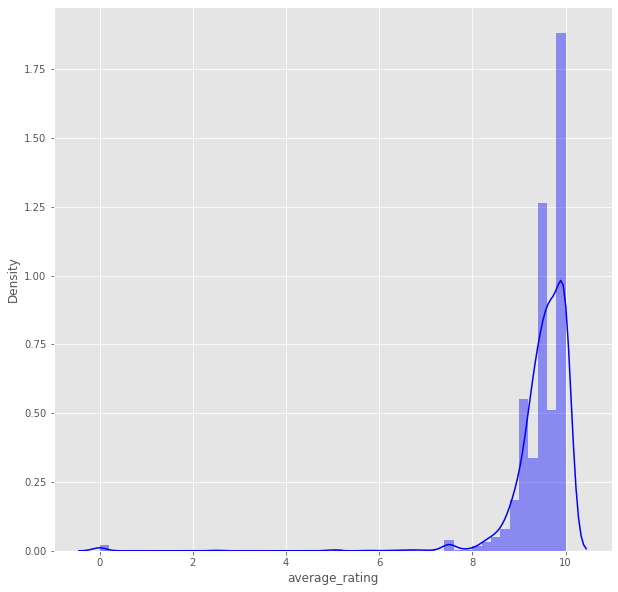

In [29]:
# 평점 
plt.figure(figsize=(10,10))
rating= df.average_rating.astype(float)
sns.distplot(rating, bins=50,color='blue')

In [20]:
df['average_rating'].describe()

count    4698.000000
mean        9.497573
std         0.798195
min         0.000000
25%         9.300000
50%         9.600000
75%         9.900000
max        10.000000
Name: average_rating, dtype: float64

In [21]:
def segregation(data):
    values = []
    for val in data.average_rating:
        if val==0:
            values.append("average_rating zero")
        elif val>0 and val<=9.3:
            values.append("average_rating lower")
        elif val>9.3 and val<=9.6:
            values.append("average_rating medium")
        elif val>9.6 and val<=9.9:
            values.append("average_rating higher")
        elif val>9.9:
            values.append("average_rating highest")
        else:
            values.append("NaN")
    print(len(values))
    return values

4698


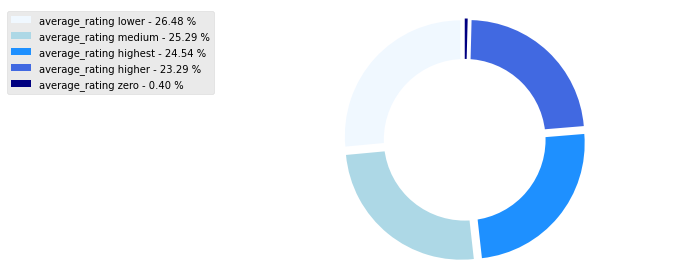

In [22]:
df['Ratings_Dist'] = segregation(df)
ratings_pie = df['Ratings_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['aliceblue','lightblue','dodgerblue','royalblue','navy']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'],colors = colors, 
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

- 2) 대여수 분포 확인하기

<AxesSubplot:xlabel='loan_count', ylabel='Density'>

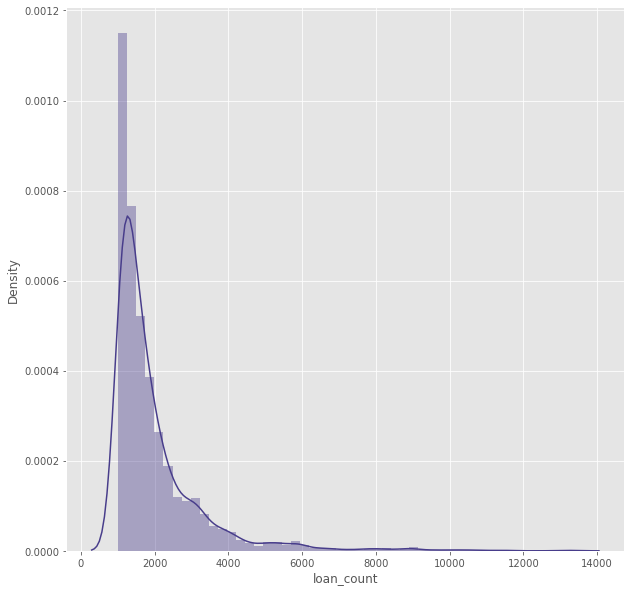

In [30]:
# 도서 대여 수 분포 확인 
plt.figure(figsize=(10,10))
rating= df.loan_count
sns.distplot(rating, bins=50,color='darkslateblue')

In [23]:
def segregation(data):
    values = []
    for val in data.loan_count:
        if val>0 and val<=1214:
            values.append("loan_count lower")
        elif val>1214 and val<=1548:
            values.append("loan_count medium")
        elif val>1548 and val<=2191:
            values.append("loan_count higher")
        elif val>2191:
            values.append("loan_count highest")
        else:
            values.append("NaN")
    print(len(values))
    return values

4698


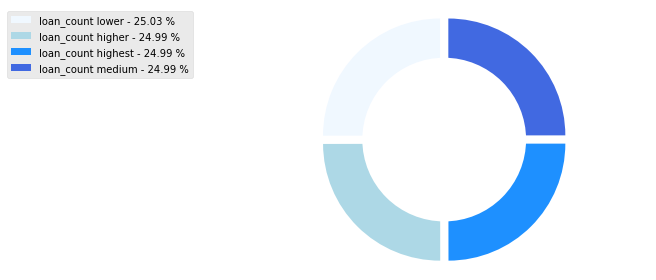

In [24]:
df['loan_Dist'] = segregation(df)
ratings_pie = df['loan_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['aliceblue','lightblue','dodgerblue','royalblue','navy']
percent = 100.*ratings_pie['loan_Dist']/ratings_pie['loan_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['loan_Dist'],colors = colors, 
         pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

- 3) 리뷰수 분포 확인하기

<AxesSubplot:xlabel='text_reviews_count', ylabel='Density'>

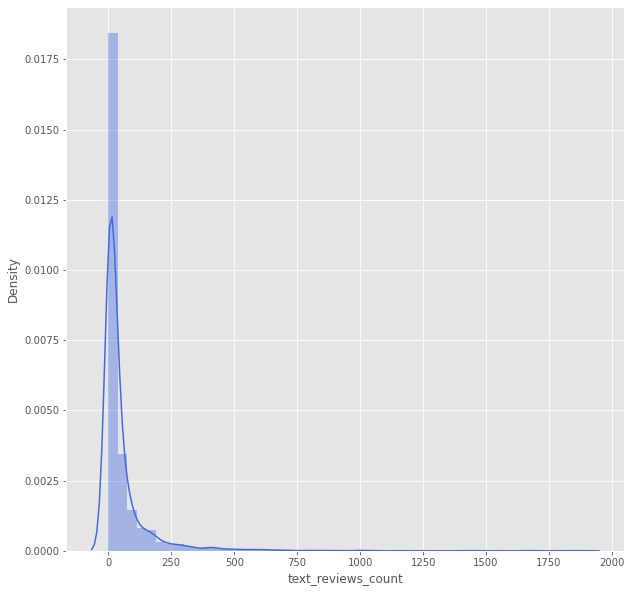

In [31]:
# 리뷰 수
plt.figure(figsize=(10,10))
rating= df.text_reviews_count
sns.distplot(rating, bins=50,color='royalblue')

In [26]:
df['text_reviews_count'].describe()

count    4698.000000
mean       53.727756
std       119.437329
min         0.000000
25%         5.000000
50%        16.000000
75%        51.000000
max      1882.000000
Name: text_reviews_count, dtype: float64

In [27]:
def segregation(data):
    values = []
    for val in data.text_reviews_count:
        if val==0:
            values.append("text_reviews_count zero")
        elif val>0 and val<=5:
            values.append("text_reviews_count lower")
        elif val>5 and val<=16:
            values.append("text_reviews_count medium")
        elif val>16 and val<=51:
            values.append("text_reviews_count higher")
        elif val>51:
            values.append("text_reviews_count highest")
        else:
            values.append("NaN")
    print(len(values))
    return values

4698


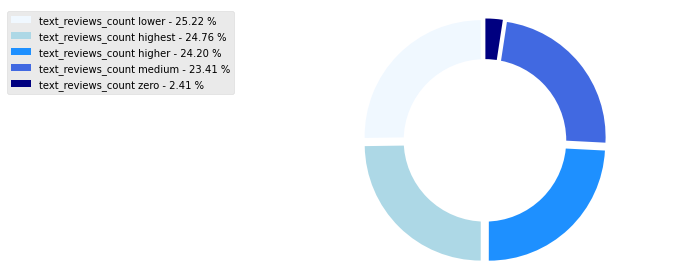

In [28]:
df['text_reviews_count_dist'] = segregation(df)
ratings_pie = df['text_reviews_count_dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['aliceblue','lightblue','dodgerblue','royalblue','navy']
percent = 100.*ratings_pie['text_reviews_count_dist']/ratings_pie['text_reviews_count_dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['text_reviews_count_dist'],colors = colors, 
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

- 평점과 리뷰 수 사이의 관계를 살펴보기

<Figure size 1080x720 with 0 Axes>

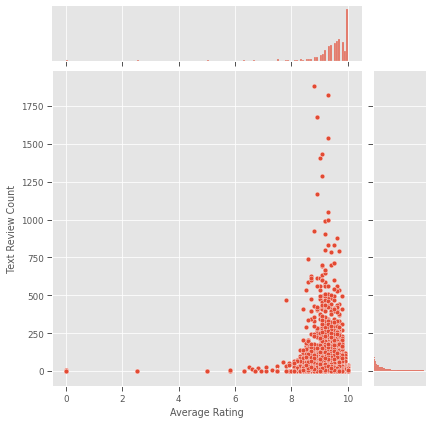

In [32]:
#Checking for any relation between them.
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data= df[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

## 4) k_means 군집분석, KNN Modeling

- KMeans 클러스터링은 레이블이 지정되지 않은 데이터를 그룹화하는 비지도 학습 유형입니다. 목표는 데이터에서 그룹을 찾는 것입니다.

- 이를 통해 평점 수와 평균 평점 값 사이의 관계 또는 그룹을 찾기 위해 노력합니다.

In [33]:
trial = df[['average_rating','loan_count','text_reviews_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['loan_count']),np.asarray(trial['text_reviews_count'])]).T

Text(0.5, 1.0, 'Elbow Curve')

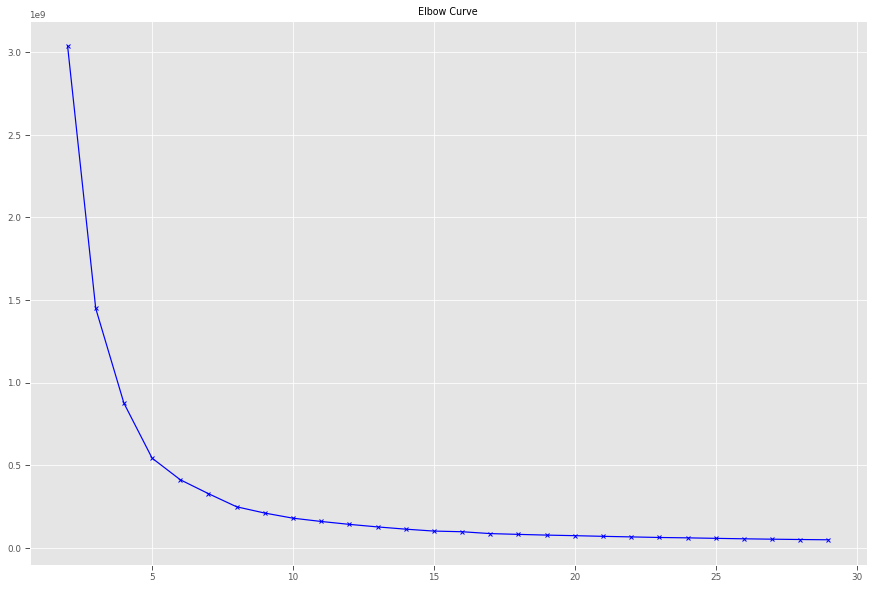

In [34]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

# elbow point가 5에서 많이 꺾이는 것을 확인할 수 있다.

In [35]:
#elbow point를 통해 군집의 수를 5로 정함
centroids, _ = kmeans(data, 5)

#각 샘플을 클러스터에 할당하기 
#벡터 양자화 : N개의 특징 벡터 집합 X를 k개의 특징 벡터들의 집합 Y로 매핑하는것

idx, _ = vq(data, centroids)

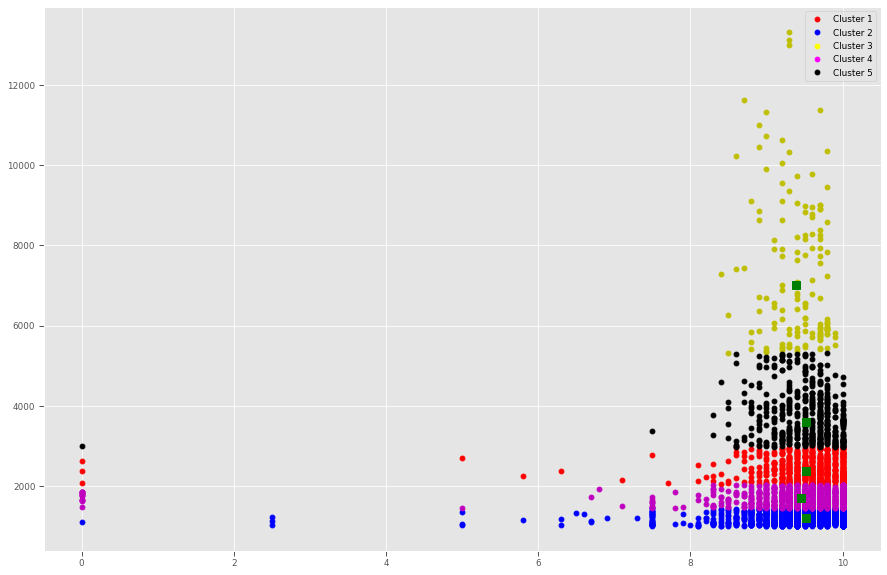

In [36]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
    
     
        
        
        
        
        )
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )




circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )


plt.show()

### Recommendation Engin

In [50]:
books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['average_rating'], df['loan_count'],df['text_reviews_count']], axis=1)

In [39]:
books_features

,average_rating higher,average_rating highest,average_rating lower,average_rating medium,average_rating zero,average_rating,loan_count,text_reviews_count
0,0,0,1,0,0,9.3,13336,1540.0
1,0,0,1,0,0,9.3,13117,997.0
2,0,0,1,0,0,9.3,13004,1819.0
3,0,0,1,0,0,8.7,11629,244.0
4,1,0,0,0,0,9.7,11385,325.0
...,...,...,...,...,...,...,...,...
4693,0,1,0,0,0,10.0,1007,8.0
4694,0,0,1,0,0,9.3,1007,36.0
4695,0,0,0,1,0,9.5,1007,9.0
4696,0,0,0,1,0,9.4,1007,19.0


- knn모델 정확도 확인하기

In [40]:
def aa(data):
    values = []
    for val in data.Ratings_Dist:
        if val=="average_rating zero":
            values.append(0)
        elif  val=="average_rating lower":
            values.append(1)
        elif val=="average_rating medium":
            values.append(2)
        elif val=="average_rating higher":
            values.append(3)
        elif val=="average_rating highest":
            values.append(4)
        else:
            values.append("NaN")
    print(len(values))
    return values

In [41]:
df['check']=aa(df)

4698


In [42]:
df_data=pd.DataFrame([df.loan_count,df.text_reviews_count,df.average_rating])

In [43]:
df_data=df_data.T

In [44]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(df_data)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(books_features, df['check'], test_size = 0.2, random_state = 100)

In [46]:
# 필요한 library import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
model = KNeighborsClassifier(n_neighbors=6, algorithm='ball_tree')
model.fit(X_train,y_train)
#distance, indices = model.kneighbors(books_features)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6)

In [48]:
prediction = model.predict(X_test)

In [49]:
print("테스트 정확도 : {0:.3f}".format((prediction==y_test).mean()))

테스트 정확도 : 0.969


- 정확도 확인 후 전체 데이터에 모델 적용하기 

In [51]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

In [52]:
distance, indices

(array([[0.00000000e+00, 4.33664617e+02, 5.85499787e+02, 2.14323712e+03,
         2.29839687e+03, 2.32846045e+03],
        [0.00000000e+00, 5.85499787e+02, 8.29730679e+02, 1.66767903e+03,
         1.85779713e+03, 1.90012897e+03],
        [0.00000000e+00, 4.33664617e+02, 8.29730679e+02, 1.99926516e+03,
         2.09075354e+03, 2.20299777e+03],
        ...,
        [0.00000000e+00, 1.80277564e+00, 2.86530976e+00, 3.16859590e+00,
         3.47706773e+00, 4.37721373e+00],
        [0.00000000e+00, 2.66270539e+00, 2.67581763e+00, 3.00665928e+00,
         5.09901951e+00, 7.17565328e+00],
        [0.00000000e+00, 1.53622915e+00, 1.80277564e+00, 3.04138127e+00,
         3.50000000e+00, 3.64005494e+00]]),
 array([[   0,    2,    1,    3,    4,    5],
        [   1,    0,    2,    3,    4,    5],
        [   2,    0,    1,    6,    3,    4],
        ...,
        [4695, 4693, 4678, 4677, 4683, 4661],
        [4696, 4686, 4681, 4669, 4658, 4692],
        [4697, 4685, 4690, 4691, 4674, 4679]], dtype

In [ ]:
# 책 이름을 찾는 데 도움이되는 특정 기능 만들기 :

# 제목에서 색인 가져 오기
# 일부 이름에서 ID 가져 오기 (모든 사람이 모든 이름을 기억할 수는 없기 때문에)
# 기능 데이터 세트에서 유사한 책을 인쇄합니다. (이는 가장 가까운 이웃의 인덱스 지표를 사용하여 책을 선택합니다.)

In [53]:
def get_index_from_name(name):
    return df[df["bookname"]==name].index.tolist()[0]

all_books_names = list(df.bookname.values)

# 특정단어를 통해 책 찾기
def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name)


# 내가 검색한 책의 인기도와 유사한 책 5권 추천
def print_similar_books(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["bookname"],df.iloc[id]["authors"],df.iloc[id]["bookImageURL"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["bookname"],df.iloc[id]["authors"],df.iloc[id]["bookImageURL"])

- 시스템이 잘 작동하는지 확인하기

In [54]:
# 평점이랑 많이 빌린책을 종합적으로 봤을때 인기있는 책 찾기 - test1
print_similar_books("여행의 이유 :김영하 산문")

나미야 잡화점의 기적 :히가시노 게이고 장편소설 지은이: 히가시노 게이고 ;옮긴이: 양윤옥 http://image.aladin.co.kr/product/15848/6/cover/k622533431_1.jpg
아몬드 (양장 특별 한정판) 손원평 (지은이) http://image.aladin.co.kr/product/16839/4/cover/k492534773_1.jpg
선량한 차별주의자 김지혜 지음 https://image.aladin.co.kr/product/19874/76/cover/8936477196_1.jpg
(추리 천재) 엉덩이 탐정 트롤 글·그림 ;김정화 옮김 https://image.aladin.co.kr/product/17457/14/cover/k792534209_1.jpg
(추리 천재) 엉덩이 탐정 트롤 글·그림 ;김정화 옮김 https://image.aladin.co.kr/product/19874/27/cover/k432635431_1.jpg


In [55]:
print_similar_books('선량한 차별주의자')

(추리 천재) 엉덩이 탐정 트롤 글·그림 ;김정화 옮김 https://image.aladin.co.kr/product/17457/14/cover/k792534209_1.jpg
(추리 천재) 엉덩이 탐정 트롤 글·그림 ;김정화 옮김 https://image.aladin.co.kr/product/19874/27/cover/k432635431_1.jpg
추리 천재 엉덩이 탐정 5 - 유적에서 날아온 SOS 사건 트롤 https://bookthumb-phinf.pstatic.net/cover/129/756/12975600.jpg?type=m1&udate=20180126
(추리 천재) 엉덩이 탐정 트롤 글·그림 ;김정화 옮김 https://bookthumb-phinf.pstatic.net/cover/124/953/12495377.jpg?type=m1&udate=20170829
추리 천재 엉덩이 탐정 6 - 수상한 탐정 사무소 사건 트롤 https://bookthumb-phinf.pstatic.net/cover/135/613/13561388.jpg?type=m1&udate=20180619


In [56]:
# 특정 단어가 들어간 책 찾아주기 
get_id_from_partial_name("해리포터")

해리포터와 마법사의 돌
해리포터와 마법사의 돌
해리포터 :마법사의 돌
해리포터와 비밀의 방
해리포터와 비밀의 방
해리포터 :마법사의 돌
해리포터 :비밀의 방
해리포터 :스페셜 리허설 에디션 대본
해리포터 :비밀의 방
해리포터와 불의 잔
해리포터 :스페셜 리허설 에디션 대본
해리포터와 아즈카반의 죄수
해리포터와 아즈카반의 죄수
해리포터 :아즈카반의 죄수
해리포터와 불의 잔
해리포터와 불사조 기사단
해리포터 :아즈카반의 죄수
해리포터 :불의 잔
해리포터와 불의 잔
해리포터와 불사조 기사단
해리포터와 혼혈왕자
해리포터 :불의 잔
해리포터와 불사조 기사단
해리포터와 불사조 기사단
해리포터와 불사조 기사단
해리포터 :불사조 기사단
해리포터와 죽음의 성물
해리포터와 혼혈왕자
해리포터 :불의 잔
해리포터와 죽음의 성물
해리포터 :혼혈 왕자
해리포터와 혼혈왕자
해리포터 :불의 잔
해리포터 :불사조 기사단
해리포터 :죽음의 성물
해리포터 :불사조 기사단
해리포터 :혼혈 왕자
해리포터 :죽음의 성물
해리포터 :불사조 기사단
해리포터 :불사조 기사단
해리포터 :혼혈 왕자
해리포터 :죽음의 성물
해리포터 :혼혈 왕자
